# Add IRIS CV dataset to notebook : https://www.kaggle.com/datasets/jeffheaton/iris-computer-vision

In [1]:
import cv2 as cv

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


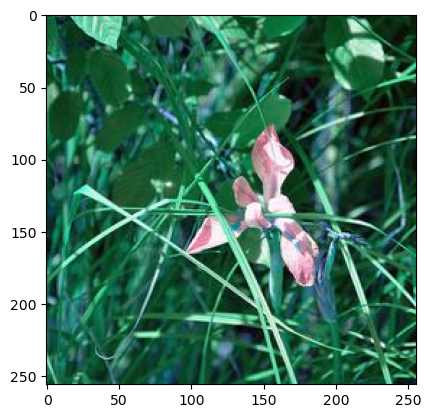

In [2]:
iris_img = cv.imread('../input/iris-computer-vision/iris-virginica/iris-08c7a0e53ee1de193062d7bf86a21adec67b9115fd6099f1b2d2ee728a936002.jpg')

#cv.imshow(iris_img)

img_plot = plt.imshow(iris_img)
plt.show()

In [3]:
# Accessing Individual Pixels
(b, g, r) = iris_img[0, 0]
print(b,g,r)

31 111 64


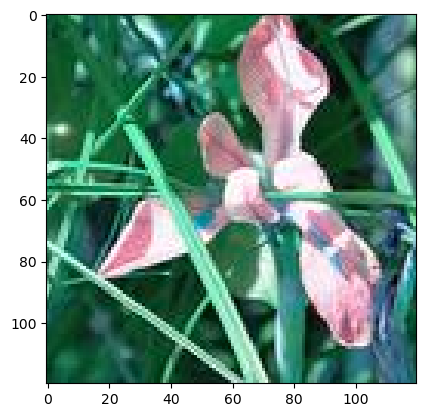

In [4]:
# Array/Region of Interest (ROI) cropping

pink = iris_img[80:200, 80:200]
plt.imshow(pink)

(256, 256, 3)


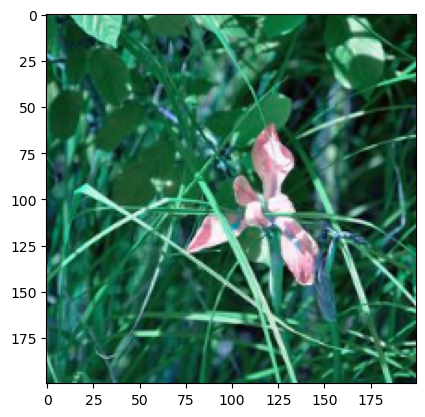

In [5]:
# Resizing images

print(iris_img.shape)
down_width = 200
down_height = 200
down_points = (down_width, down_height)
resized_down = cv.resize(iris_img, down_points)
plt.imshow(resized_down)

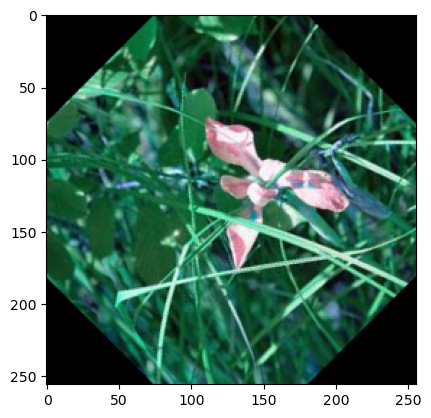

In [6]:
# Rotating an image

# https://www.kaggle.com/datasets/aditipanda1/exprotation
# https://learnopencv.com/image-rotation-and-translation-using-opencv/

# grab the dimensions of the image and calculate the center of the image
(h, w) = iris_img.shape[:2]
center = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=45, scale=1)

rotated = cv.warpAffine(src=iris_img, M=rotate_matrix, dsize=(w, h))

plt.imshow(rotated)

# Edge Detection

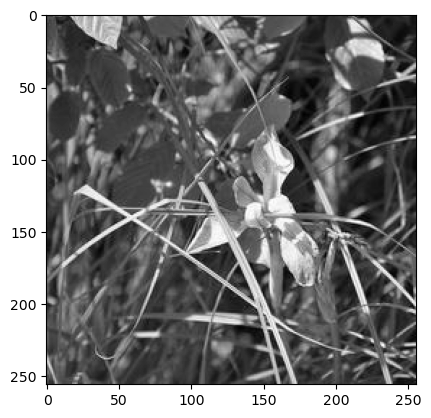

In [7]:
# Convert to graycsale
img_gray = cv.cvtColor(iris_img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
# plt.imshow(iris_img, cmap='gray')

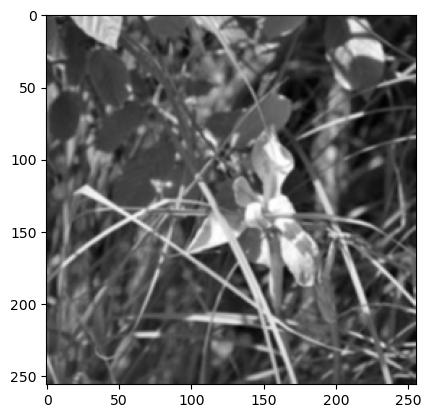

In [8]:
# Blur the image for better edge detection

img_blur = cv.GaussianBlur(img_gray, (3,3), 0)
plt.imshow(img_blur, cmap='gray')

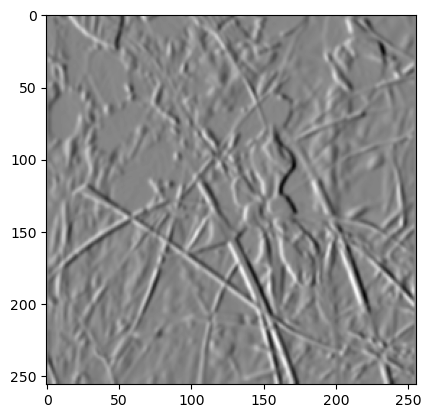

In [9]:
# Sobel Edge Detection
# https://learnopencv.com/edge-detection-using-opencv/

sobelx = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5)
plt.imshow(sobelx, cmap='gray')

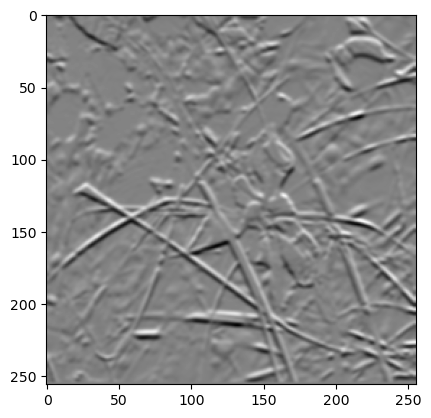

In [10]:
sobely = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=0, dy=1, ksize=5)
plt.imshow(sobely, cmap='gray')

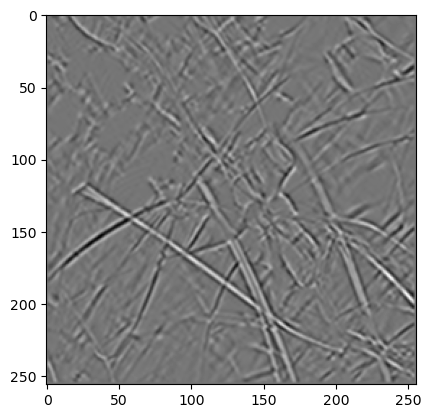

In [11]:
sobelxy = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=1, ksize=5) 
plt.imshow(sobelxy, cmap='gray')

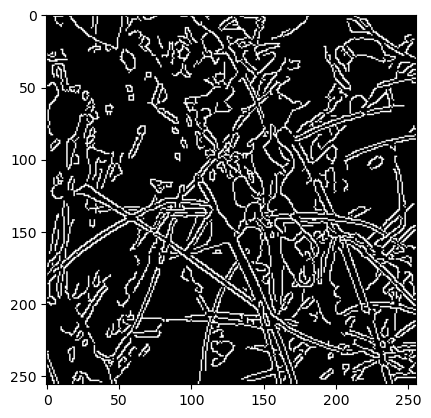

In [12]:
edges = cv.Canny(image=img_blur, threshold1=100, threshold2=200)
plt.imshow(edges, cmap='gray')

# Thresholding

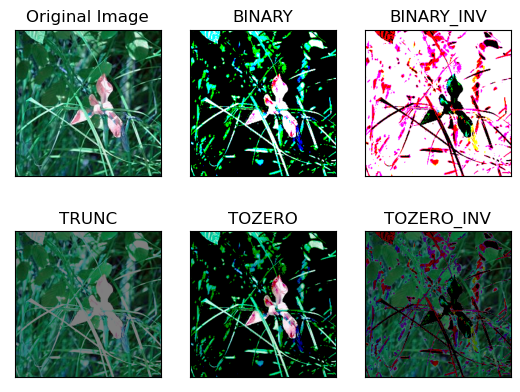

In [13]:
img = iris_img
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Masking and Bitwise Ops 

In computer science terms, everything we represent is converted into binary language and also stored in binary format. 

When it comes to displaying an image if there is no color in the pixel, the value is assigned ‘0’, and when there is some color stored in the pixel then the value is assigned ‘1’.

When we perform bitwise operations on images in OpenCV, they are actually performed on 0’s and 1’s of the image.

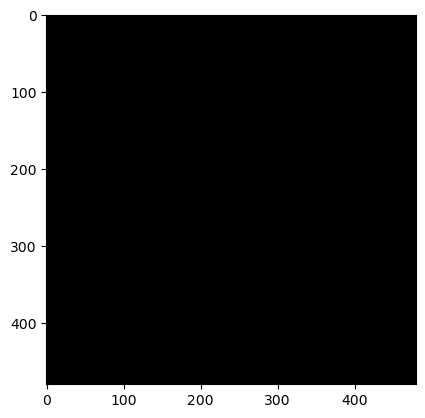

In [14]:
import numpy as np
black = np.zeros((480, 480), dtype = "uint8")
plt.imshow(black, cmap='gray')

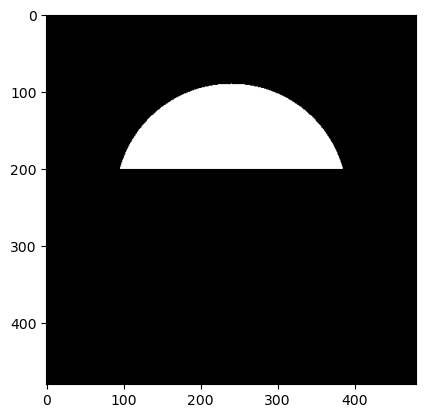

In [15]:
black = np.zeros((480, 480), dtype = "uint8")
rect = cv.rectangle(black.copy(), (50, 60), (400, 200), 255, -1)
circle = cv.circle(black.copy(), (240, 240), 150, 255, -1)
bit_and = cv.bitwise_and(rect, circle)
plt.imshow(rect, cmap='gray')
plt.imshow(circle)
plt.imshow( bit_and, cmap='gray')

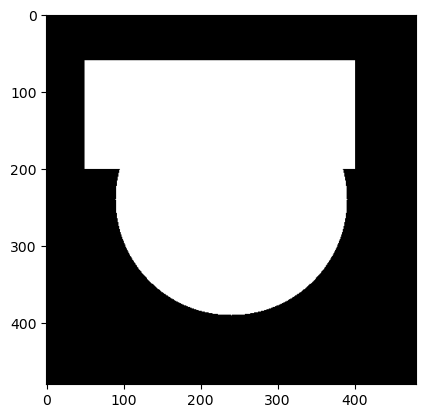

In [16]:
bit_or = cv.bitwise_or(rect, circle)
plt.imshow( bit_or, cmap='gray')

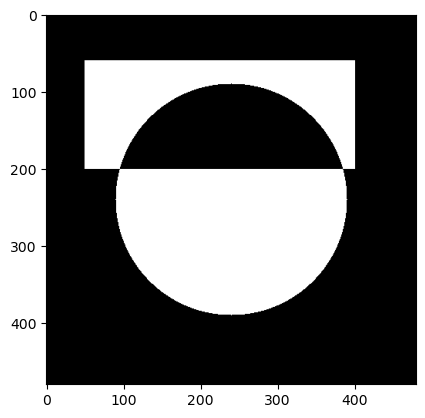

In [17]:
bit_Xor = cv.bitwise_xor(rect, circle)
plt.imshow( bit_Xor, cmap='gray')

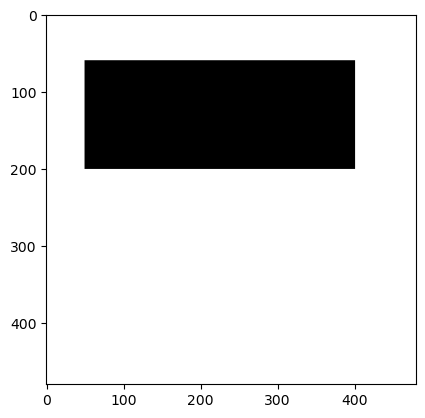

In [18]:
bit_not1 = cv.bitwise_not(rect)
plt.imshow( bit_not1, cmap='gray')

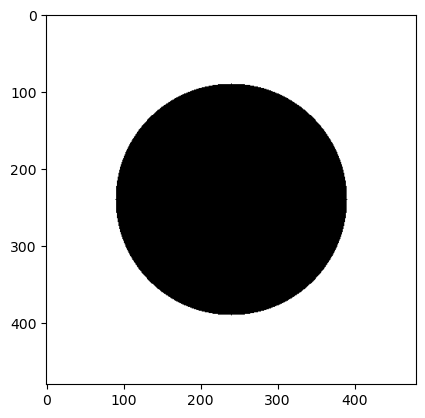

In [19]:
bit_not2 = cv.bitwise_not(circle)
plt.imshow( bit_not2, cmap='gray')

(256, 256)


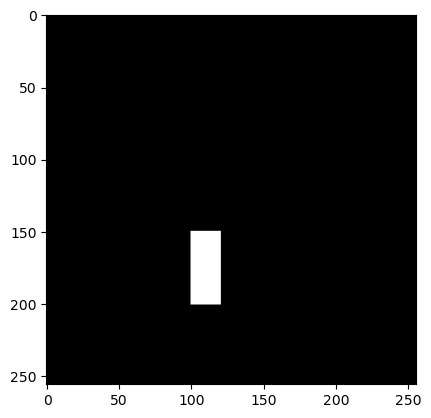

In [20]:
## Masking

#create a blank image using np.zeros()
blank = np.zeros(iris_img.shape[:2], dtype = "uint8")
print(blank.shape)

#draw rectangle on the blank image
mask = cv.rectangle(blank, (100, 150), (120, 200), (255, 255, 255), -1)
plt.imshow( mask, cmap='gray')

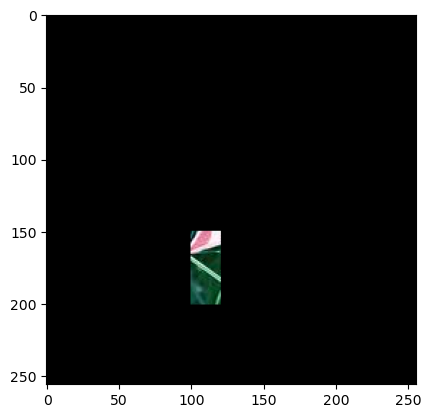

In [21]:
maskedimage= cv.bitwise_and(iris_img, iris_img, mask=mask)
plt.imshow( maskedimage)

# Color Spaces

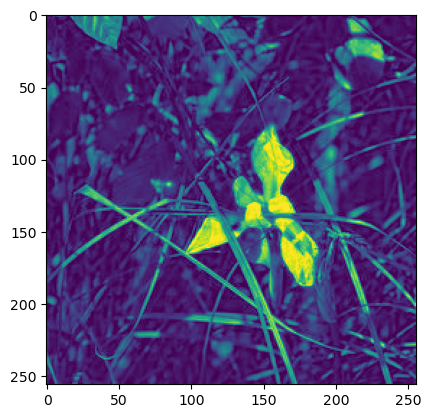

In [22]:
B, G, R = cv.split(iris_img)
plt.imshow(B)

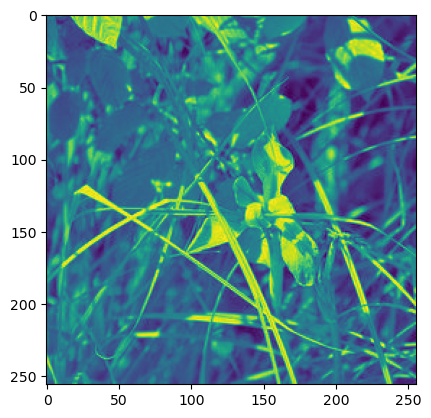

In [23]:
plt.imshow(G)

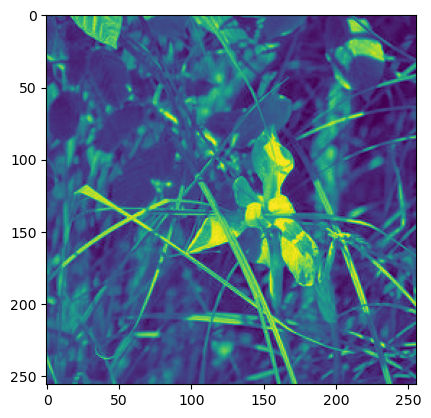

In [24]:
plt.imshow(R)

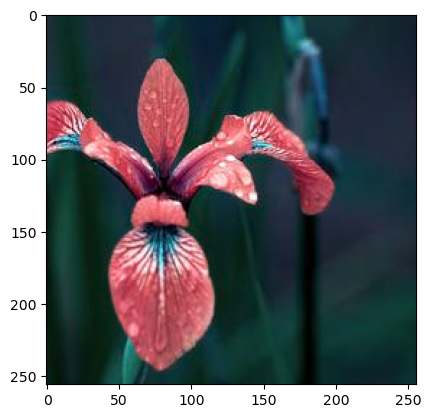

In [25]:
im1 = cv.imread('../input/iris-computer-vision/iris-virginica/iris-3b19970f2f6807b8a41c3c426d4b0032fba84d025929eb6e6ff01501995fc1c2.jpg')
plt.imshow(im1)

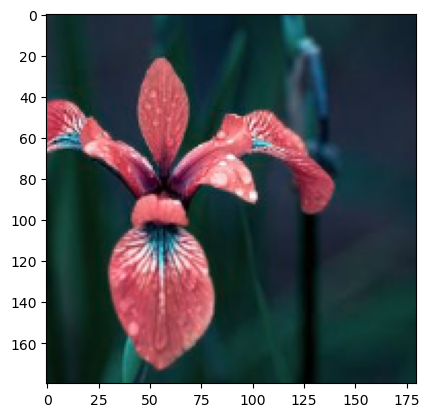

In [26]:
im1 = cv.resize(im1, (180,180))
plt.imshow(im1)

(256, 256, 3)


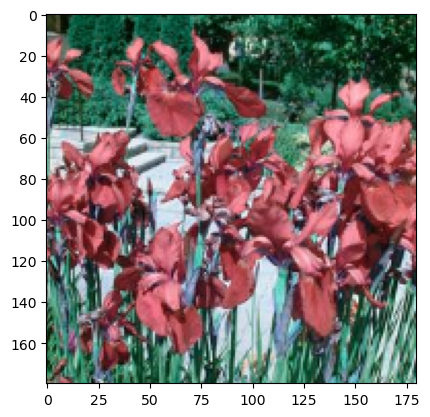

In [27]:
im2 = cv.imread('/kaggle/input/iris-computer-vision/iris-versicolour/iris-009322547cb81cbb4dbc63c298304a2df8ea617191651d4cbd50b7a5bbba8a6a.jpg')
print(im2.shape)
im2 = cv.resize(im2, (180,180))
plt.imshow(im2)

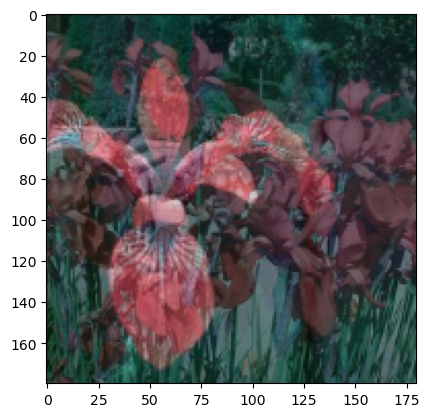

In [28]:
weightedSum = cv.addWeighted(im1, 0.5, im2, 0.4, 0)

plt.imshow(weightedSum)

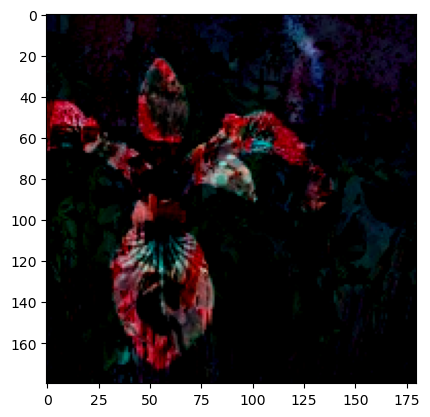

In [29]:
sub = cv.subtract(im1, im2)
plt.imshow(sub)

# Histogram Computation

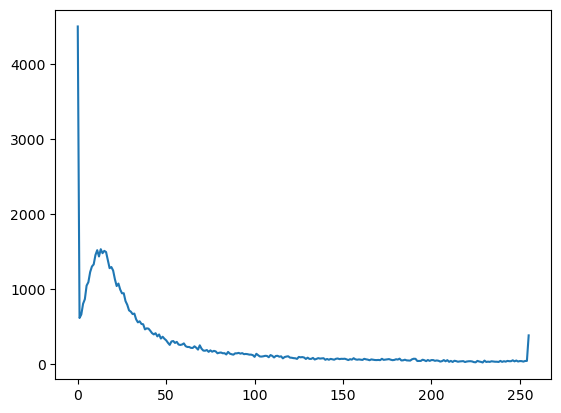

In [30]:
# grayscale histogram
hist = cv.calcHist([iris_img], [0], None, [256], [0, 256])
plt.plot(hist)

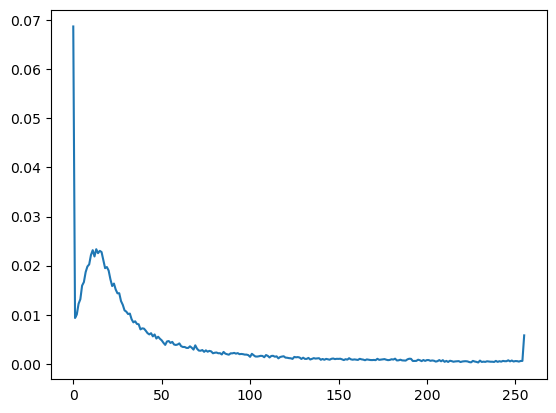

In [31]:
hist /= hist.sum()
plt.plot(hist)

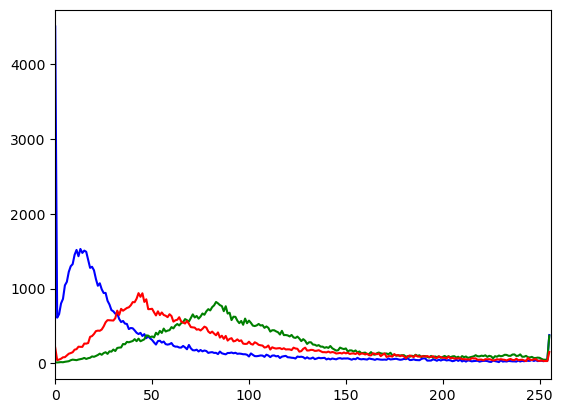

In [32]:
# color channel wise histograms

chans = cv.split(iris_img)
colors = ("b", "g", "r")

for (chan, color) in zip(chans, colors):
    
	# create a histogram for the current channel and plot it
	hist = cv.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

Resources:

https://learnopencv.com/image-rotation-and-translation-using-opencv/

https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/
